In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

In [2]:
# Load the CSV file created into a Pandas DataFrame
school1_df = pd.read_csv("school_data/District_Monthly_Shares_03.08.23.csv", encoding='utf-8')
school2_df = pd.read_csv("school_data/NCES_2020-2021_School_Demographics.csv", encoding='utf-8')

C:\Users\vivi4\AppData\Local\Temp\ipykernel_20544\1699805587.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  school2_df = pd.read_csv("school_data/NCES_2020-2021_School_Demographics.csv", encoding='utf-8')


In [3]:
# Display school1_df data
school1_df.head()

,StateAbbrev,NCESDistrictID,month,DistrictName,share_inperson,share_hybrid,share_virtual
0,AK,200001,2020m8,Lower Kuskokwim School District,0.003278,0.0,0.996722
1,AK,200001,2020m9,Lower Kuskokwim School District,0.002640,0.0,0.997360
2,AK,200001,2020m10,Lower Kuskokwim School District,0.002889,0.0,0.997111
3,AK,200001,2020m11,Lower Kuskokwim School District,0.002926,0.0,0.997074
4,AK,200001,2020m12,Lower Kuskokwim School District,0.002938,0.0,0.997062


In [4]:
# Display school2_df data
school2_df.head()

,year,NCESSchoolID,ncessch_num,school_id,school_name,NCESDistrictID,lea_name,state_leaid,district_agency_type,seasch,...,state_leg_district_upper,enroll_white,enroll_black,enroll_hispanic,enroll_asian,enroll_AMindAKnative,enroll_nativeHIpacific,enroll_twoormore,enroll_unknown,enroll_total
0,2020.0,1.000050e+10,1.000050e+10,100870.0,Albertville Middle School,100005,Albertville City,AL-101,Regular local school district,101-0010,...,01009,371.0,33.0,469.0,4.0,2.0,0.0,29.0,0.0,908.0
1,2020.0,1.000050e+10,1.000050e+10,100871.0,Albertville High School,100005,Albertville City,AL-101,Regular local school district,101-0020,...,01009,706.0,70.0,785.0,6.0,1.0,0.0,38.0,0.0,1606.0
2,2020.0,1.000050e+10,1.000050e+10,100879.0,Albertville Intermediate School,100005,Albertville City,AL-101,Regular local school district,101-0110,...,01009,345.0,24.0,481.0,7.0,4.0,1.0,29.0,0.0,891.0
3,2020.0,1.000050e+10,1.000050e+10,100889.0,Albertville Elementary School,100005,Albertville City,AL-101,Regular local school district,101-0200,...,01009,340.0,48.0,497.0,4.0,4.0,0.0,15.0,0.0,908.0
4,2020.0,1.000050e+10,1.000050e+10,101616.0,Albertville Kindergarten and PreK,100005,Albertville City,AL-101,Regular local school district,101-0035,...,01009,216.0,33.0,288.0,2.0,4.0,0.0,13.0,0.0,556.0


In [5]:
# Define columns to keep
school_type = school1_df[['StateAbbrev', 'share_inperson', 'share_hybrid', 'share_virtual']]

# Grouping the data by 'StateAbbrev' and summing and calculating the mean of the values
school_type_summary = school_type.groupby('StateAbbrev').agg({
    'share_inperson': ['mean'],
    'share_hybrid': ['mean'],
    'share_virtual': ['mean']
}).reset_index()

# Rename columns in the school_type_summary DataFrame
school_type_summary.columns = ['state', 'inperson', 'hybrid', 'virtual']

# Convert the mean values to percentages
school_type_summary['inperson'] = (school_type_summary['inperson'] * 100).round(0).astype(int)
school_type_summary['hybrid'] = (school_type_summary['hybrid'] * 100).round(0).astype(int)

# Calculating the third column based on remaining percentage to ensure the total is 100%
school_type_summary['virtual'] = 100 - school_type_summary['inperson'] - school_type_summary['hybrid']

# Handling edge cases where the sum might not exactly equal 100%
school_type_summary['virtual'] = school_type_summary['virtual'].apply(lambda x: x + 1 if x == 99 else x)

school_type_summary.head()

,state,inperson,hybrid,virtual
0,AK,63,9,28
1,AL,66,28,6
2,AR,81,19,0
3,AZ,6,56,38
4,CA,14,22,64


In [6]:
# Define columns to keep
school_enrollment = school2_df[['state_location', 'fips', 'enrollment']]

# Grouping the data by 'state_location' and summing and calculating the total enrollment.
school_enrollmentByState = school_enrollment.groupby('state_location').agg({
    'fips': 'first',
    'enrollment': ['sum']
}).reset_index()

# Rename columns in the school_enrollmentByState DataFrame
school_enrollmentByState.columns = ['state', 'state_name', 'enrollment']

# Remove the decimal point from 'enrollment' values by converting them to integers
school_enrollmentByState['enrollment'] = school_enrollmentByState['enrollment'].astype(int)

school_enrollmentByState.head()

,state,state_name,enrollment
0,AK,Alaska,129872
1,AL,Alabama,732393
2,AR,Arkansas,486305
3,AS,American Samoa,10246
4,AZ,Arizona,1118311


In [7]:
# Merge the two DataFrames by the 'state' column
school_merged_data = pd.merge(school_enrollmentByState, school_type_summary, on='state')

# Remove decimal points in the 'enrollment' column and convert to integer to remove decimal point
school_merged_data['enrollment'] = school_merged_data['enrollment'].astype(int) 

school_merged_data.head()

,state,state_name,enrollment,inperson,hybrid,virtual
0,AK,Alaska,129872,63,9,28
1,AL,Alabama,732393,66,28,6
2,AR,Arkansas,486305,81,19,0
3,AZ,Arizona,1118311,6,56,38
4,CA,California,5959007,14,22,64


In [8]:
# Saving as CSV
school_merged_data.to_csv('clean_data/school_clean_data.csv', index=False)

In [9]:
school_merged_data.dtypes

state         object
state_name    object
enrollment     int32
inperson       int32
hybrid         int32
virtual        int64
dtype: object

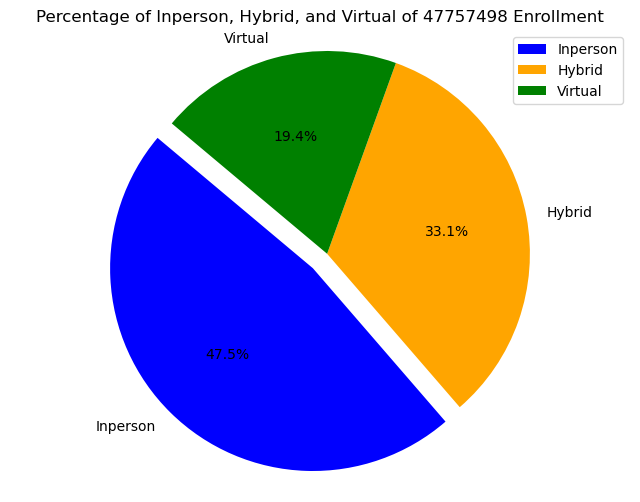

In [10]:
# Calculate total enrollment
total_enrollment = school_merged_data['enrollment'].sum()

# Calculate percentages
percent_inperson = (school_merged_data['inperson'].sum() / total_enrollment)
percent_hybrid = (school_merged_data['hybrid'].sum() / total_enrollment)
percent_virtual = (school_merged_data['virtual'].sum() / total_enrollment)

# Pie chart data
labels = ['Inperson', 'Hybrid', 'Virtual']
sizes = [percent_inperson, percent_hybrid, percent_virtual]
colors = ['blue', 'orange', 'green']
explode = (0.1, 0, 0)  # To explode the 1st slice (Inperson)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Inperson, Hybrid, and Virtual of ' + str(total_enrollment) +' Enrollment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()

# Save the figure
plt.savefig("./school_image/Fig1.png")

plt.show()